In [487]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import leastsq
%matplotlib inline

* ps: numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*

In [488]:
#目标函数
def real_function(x):
    return np.sin(2*np.pi*x)

#多项式
def fit_function(p,x):
    f=np.poly1d(p)
    return f(x)
    
#残差(误差函数)
def residual_function(p,x,y):
    ret=fit_function(p,x)-y  #因为输入的数据点有十个，所以输出的误差也有十个
    return ret
    

曲线的产生原理：无数点连接在一起，看似成一条直线,输出形式以列表存放
np.random.rand(M+1)：
   * randn函数返回一个或一组样本，具有标准正态分布。
   * dn表格每个维度
   * 返回值为指定维度的arra
   
   * np.random.rand(4,2)：4x2的二维矩阵，0~1之间
   * array([[ 0.02173903,  0.44376568],
           * [ 0.25309942,  0.85259262],
           * [ 0.56465709,  0.95135013],
           * [ 0.14145746,  0.55389458]])
   * np.random.rand(2)：一维度矩阵
   * array([0.02173903])    

In [489]:
x=np.linspace(0,1,1000)
x_points=np.linspace(0,1,10)  #添加十个噪音点
y=real_function(x_points)  #说是曲线函数，实际上是无限个点连接在一起
y_points=[np.random.normal(0,0.1)+yi for yi in y]  #噪音点对应的y值

def fitting(M=0):
    '''M 为多项式的次数'''
    #随机初始化多项式参数
    p_init=np.random.rand(M+1)  
    #最小二乘法,p_lsp：表示最优的参数
    p_lsq = leastsq(residual_function,  #误差函数
                     x0=p_init,   #表示函数的参数列表
                     args=(x_points,y_points)) #拟合的数据点
    print('Fitting Parameters:', p_lsq[0])

    #可视化
    plt.plot(x,real_function(x),"g",label="real function")  #生成目标曲线
    plt.plot(x_points,y_points,"bo",label="noise")  #是个噪音点
    plt.plot(x,fit_function(p_lsq[0],x),"r",label="fitted curve")  #拟合曲线
    plt.legend()
    return p_lsq
    



Fitting Parameters: [0.08073173]


(array([0.08073173]), 1)

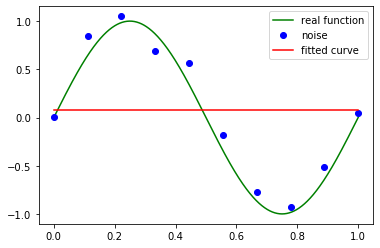

In [490]:
fitting(M=0)

Fitting Parameters: [-1.46917926e+00  2.33883087e+01 -3.26386214e+01  1.08129544e+01
  4.80742295e-03]


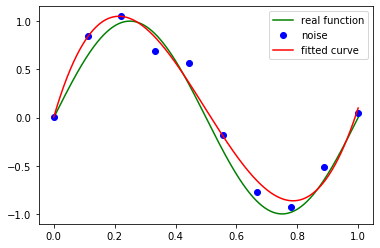

In [491]:
p_lsq_4=fitting(M=4)

Fitting Parameters: [-2.11540923e+02  6.09115278e+02 -6.51146523e+02  3.36942216e+02
 -9.87328002e+01  1.54043786e+01  4.67135029e-03]


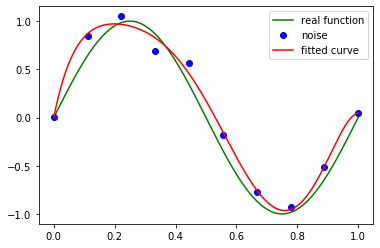

In [492]:
p_lsq_6=fitting(M=6)

Fitting Parameters: [-3.21405363e+04  1.48788000e+05 -2.90061131e+05  3.09022777e+05
 -1.95119622e+05  7.39347892e+04 -1.61555025e+04  1.80080727e+03
 -6.95417086e+01  8.77692940e-03]


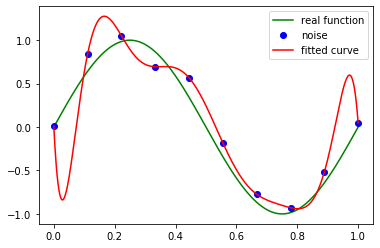

In [493]:
p_lsq_9=fitting(M=9)

当M=9时，多项式的曲线通过了每一个数据点，但是造成了过拟合

# 正则化-选择最好的模型（防止过拟合）

正则化的作用
* 选择经验风险和模型复杂度同时最小的模型

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [494]:
regularization = 0.0001

#L2正则化残差（误差方程）
def  residuals_func_regularization(p,x_points,y_points):
    ret=fit_function(p,x_points)-y_points  #因为输入的数据点有十个，所以输出的误差也有十个
    ret=np.append(ret,(regularization*0.5*np.square(p)))  #L2范数作为正则化项
    return ret

In [495]:
#最小二乘法+正则化项
p_init=np.random.rand(9+1)  #生成一维度矩阵参数
p_lsq_regularization=leastsq(residuals_func_regularization,  #误差函数
                            x0=p_init,   #表示函数的参数列表
                            args=(x_points,y_points)) #拟合的数据点
print(p_lsq_regularization)

(array([-22.72221027,  12.97619123,  18.43182372,  10.95883977,
       -17.60246677,  -8.4865965 ,  25.23487908, -28.37377636,
         9.59652002,   0.03634976]), 1)


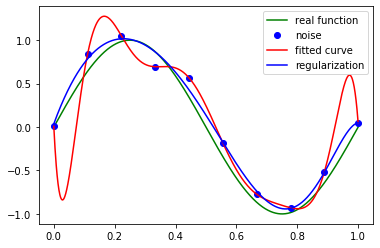

In [496]:
#可视化
plt.plot(x,real_function(x),"g",label="real function")  #生成目标曲线
plt.plot(x_points,y_points,"bo",label="noise")  #是个噪音点
plt.plot(x,fit_function(p_lsq_9[0],x),"r",label="fitted curve")  #拟合曲线
plt.plot(x,fit_function(p_lsq_regularization[0],x),"b",label="regularization")  #正则化拟合曲线
plt.legend()